In [2]:
import requests
import json

url = "https://raw.githubusercontent.com/goncalogteixeira/onlyActionFiles/master/_notebooks/props.json"

r = requests.get(url)
houses = json.loads(r.text)
houses
#print( "Number of houses read:" , len(houses) )

# short resume of houses


[{'prop': {'img_url': 'https://cdn.21onlineapp.com/assets/images/apt-t3-feijo_0e6fd1c4-22b9-4b73-8696-ecb2103fae81.jpg?down.colorspace=linear&f.sharpen=50&w=400&h=282&scale=both&mode=crop&format=jpg&quality=85',
   'link': 'https://www.century21.pt/comprar/apartamento/almada/apartamento-t3-95m2-apartamento-t3-no-feijo-r-c-alto-laranjeiro-e-feijo-feijo-2035479',
   'location': 'Almada, Laranjeiro e Feijo, Feijo',
   'price': '149 900 EUR',
   'title': 'APARTAMENTO T3 NO FEIJO R/C ALTO'},
  'specs': {'construction_year': '1984',
   'energetic_cert': 'C',
   'gross_area': '100',
   'nbaths': '1 Casa de banho',
   'nrooms': '3 Quartos',
   'ref': '0739-02279',
   'state_prop': 'Bom',
   'state_sale': 'Venda',
   'type_prop': 'Apartamento',
   'useful_area': '95'}},
 {'prop': {'img_url': 'https://cdn.21onlineapp.com/assets/images/img-20200228-163542_e68db89c-18d4-4144-90ae-2b3bc53a5e60.jpg?down.colorspace=linear&f.sharpen=50&w=400&h=282&scale=both&mode=crop&format=jpg&quality=85',
   'link'

Resumo das casas lidas

In [0]:


from IPython.display import HTML
from IPython.display import Image

for house in houses:
  print (house.get("prop").get("title") , "," , house.get("prop").get("location"), "," , house.get("prop").get("price") )
  print("Detalhes-" , house.get("specs").get("nbaths") , "," , house.get("specs").get("nrooms") , ", Area total" ,house.get("specs").get("gross_area") , ", Area util" ,house.get("specs").get("useful_area") )

APARTAMENTO T3 NO FEIJO R/C ALTO , Almada, Laranjeiro e Feijo, Feijo , 149 900 EUR
Detalhes- 1 Casa de banho , 3 Quartos , Area total 100 , Area util 95
Apartamento T2 em Torres Novas , Torres Novas, Torres Novas (Santa Maria Salvador e Santiago), Centro (Santa Maria) , 87 500 EUR
Detalhes- 1 Casa de banho , 2 Quartos , Area total 124 , Area util 101
T1 , 2 assoalhadas na Quinta dos Alcoutins , Lisboa, Lumiar , 236 900 EUR
Detalhes- 1 Casa de banho , 1 Quarto , Area total 60 , Area util 56
T2 , 3 assoalhadas na Quinta dos Alcoutins , Lisboa, Lumiar , 489 250 EUR
Detalhes- 2 Casas de banho , 2 Quartos , Area total 134 , Area util 122
T1 , 2 assoalhadas com terraco de 15 m2 na Quinta dos Alcoutins , Lisboa, Lumiar , 247 200 EUR
Detalhes- 1 Casa de banho , 1 Quarto , Area total 75 , Area util 60
T1 , 2 assoalhadas na Quinta dos Alcoutins , Lisboa, Lumiar , 257 500 EUR
Detalhes- 1 Casa de banho , 1 Quarto , Area total 55 , Area util 55
T2 , 3 assoalhadas na Quinta dos Alcoutins , Lisboa, L

Price By location

['489', '250', 'EUR'] 489250
['247', '200', 'EUR'] 247200
['257', '500', 'EUR'] 257500
['463', '500', 'EUR'] 463500
['267', '800', 'EUR'] 267800
['236', '900', 'EUR'] 236900
['587', '100', 'EUR'] 587100
['494', '400', 'EUR'] 494400
{'Medio': 3637950, 'Almada': 149900, 'Torres Novas': 87500, 'Lisboa': 3280550, 'Seixal': 120000}


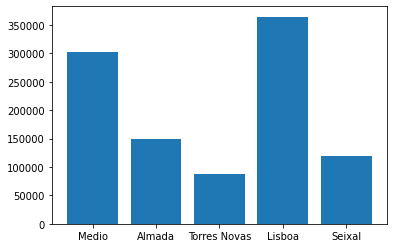

In [0]:
import matplotlib.pyplot as plt

CostByPlace = {}
NumByPlace = {}
CostByPlace["Medio"] = 0
NumByPlace["Medio"] = 0
for house in houses:
    locationaux= house.get("prop").get("location").split(",")
    location=locationaux[0]
    if location in CostByPlace.keys():
        priceaux = house.get("prop").get("price").split()
        price=int(priceaux[0]+priceaux[1])
        print (priceaux , price)
        oldPrice = CostByPlace.get(location)
        CostByPlace[location] = oldPrice+price
        NumByPlace[location]= NumByPlace[location]+1
        CostByPlace["Medio"] = CostByPlace["Medio"] + price
        NumByPlace["Medio"] = NumByPlace["Medio"] +1
    else:
        NumByPlace[location]= 1
        NumByPlace["Medio"] = NumByPlace["Medio"] +1
        priceaux = house.get("prop").get("price").split()
        price = int(priceaux[0] + priceaux[1])
        CostByPlace[location] = price
        CostByPlace["Medio"] = CostByPlace["Medio"] + price

print(CostByPlace)
for key in CostByPlace.keys():
    CostByPlace[key]= CostByPlace[key]/ NumByPlace[key]


plt.bar(range(len(CostByPlace)), list(CostByPlace.values()), align='center')
plt.xticks(range(len(CostByPlace)), list(CostByPlace.keys()))
plt.show()

Square Feet by location

{'Medio': 1184, 'Almada': 100, 'Torres Novas': 124, 'Lisboa': 878, 'Seixal': 82}


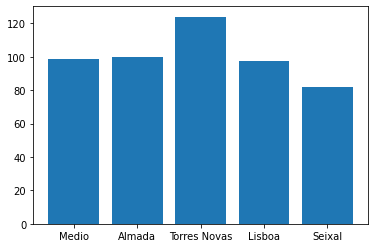

In [4]:
import matplotlib.pyplot as plt

AreaByPlace = {}
NumOfArea = {}
AreaByPlace["Medio"] = 0
NumOfArea["Medio"] = 0
for house in houses:
    locationaux= house.get("prop").get("location").split(",")
    location=locationaux[0]
    if location in AreaByPlace.keys():
        price = int(house.get("specs").get("gross_area"))
        oldPrice = AreaByPlace.get(location)
        AreaByPlace[location] = oldPrice+price
        NumOfArea[location]= NumOfArea[location]+1
        AreaByPlace["Medio"] = AreaByPlace["Medio"] + price
        NumOfArea["Medio"] = NumOfArea["Medio"] +1
    else:
        NumOfArea[location]= 1
        NumOfArea["Medio"] = NumOfArea["Medio"] +1
        price = int(house.get("specs").get("gross_area"))
        AreaByPlace[location] = price
        AreaByPlace["Medio"] = AreaByPlace["Medio"] + price

print(AreaByPlace)
for key in AreaByPlace.keys():
    AreaByPlace[key]= AreaByPlace[key]/ NumOfArea[key]


plt.bar(range(len(AreaByPlace)), list(AreaByPlace.values()), align='center')
plt.xticks(range(len(AreaByPlace)), list(AreaByPlace.keys()))
plt.show()



Price By square foot by Location

{'Medio': 38320.288930355826, 'Almada': 1499.0, 'Torres Novas': 705.6451612903226, 'Lisboa': 34652.229134919166, 'Seixal': 1463.4146341463415}
{'Medio': 3193.3574108629855, 'Almada': 1499.0, 'Torres Novas': 705.6451612903226, 'Lisboa': 3850.247681657685, 'Seixal': 1463.4146341463415}


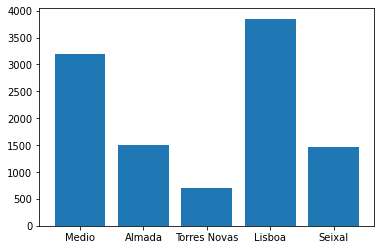

In [0]:
import matplotlib.pyplot as plt

CostbySquareMeter = {}
NumOfPlace = {}
CostbySquareMeter["Medio"] = 0
NumOfPlace["Medio"] = 0
for house in houses:
    locationaux= house.get("prop").get("location").split(",")
    location=locationaux[0]
    if location in CostbySquareMeter.keys():
        grossArea = int(house.get("specs").get("gross_area"))
        priceaux = house.get("prop").get("price").split()
        price=int(priceaux[0]+priceaux[1])/grossArea
        #print ( location , grossArea , price , price/grossArea)
        oldPrice = CostbySquareMeter.get(location)
        CostbySquareMeter[location] = oldPrice+price
        NumOfPlace[location]= NumOfPlace[location]+1
        CostbySquareMeter["Medio"] = CostbySquareMeter["Medio"] + price
        NumOfPlace["Medio"] = NumOfPlace["Medio"] +1
    else:
        NumOfPlace[location]= 1
        grossArea = int(house.get("specs").get("gross_area"))
        NumOfPlace["Medio"] = NumOfPlace["Medio"] +1
        priceaux = house.get("prop").get("price").split()
        price = int(priceaux[0] + priceaux[1])/grossArea
        CostbySquareMeter[location] = price
        CostbySquareMeter["Medio"] = CostbySquareMeter["Medio"] + price


print(CostbySquareMeter)
for key in CostbySquareMeter.keys():
    CostbySquareMeter[key]= CostbySquareMeter[key]/ NumOfPlace[key]
print(CostbySquareMeter)




plt.bar(range(len(CostbySquareMeter)), list(CostbySquareMeter.values()), align='center')
plt.xticks(range(len(CostbySquareMeter)), list(CostbySquareMeter.keys()))
plt.show()

Price By gross area

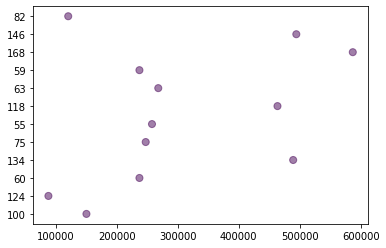

In [5]:

import matplotlib.pyplot as plt

GrossArea=[]
Price=[]
colors=[]
area=[]
for house in houses:
    GrossArea.append(house.get("specs").get("gross_area"))
    priceaux = house.get("prop").get("price").split()
    price = int(priceaux[0] + priceaux[1])
    Price.append(price)
    colors.append(0.5)
    area.append(50)




plt.scatter(Price, GrossArea, s=area, c=colors, alpha=0.5)
plt.show()

